In [2]:
import pandas as pd

df = pd.read_csv('test.csv')
print(df.head())
print(df.columns)
print(df.info())

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from  
0     sally.beck@enron.com  
1      eric.bass@enron.com  
2     sally.beck@enron.com  
3  johnny.palmer@enron.com  
4  lydia.delgado@enron.com  
Index(['Subject', 'body', 'date', 'from'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 en

Task 1

In [16]:
# Task 1
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

# Ensure the vader_lexicon resource is downloaded
nltk.download('vader_lexicon')

df = pd.read_csv("test.csv")
sia = SentimentIntensityAnalyzer()

def classify_sentiment(text):
    if pd.isna(text):
        return "Neutral"
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['body'].apply(classify_sentiment)
df[['body', 'Sentiment']].head()


[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


,body,Sentiment
0,EnronOptions Announcement\n\n\nWe have updated...,Positive
1,"Marc,\n\nUnfortunately, today is not going to ...",Positive
2,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",Neutral
3,we were thinking papasitos (we can meet somewh...,Neutral
4,Since you never gave me the $20 for the last t...,Positive


Task 2

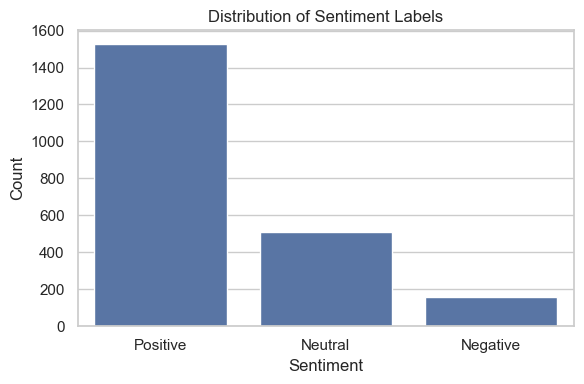

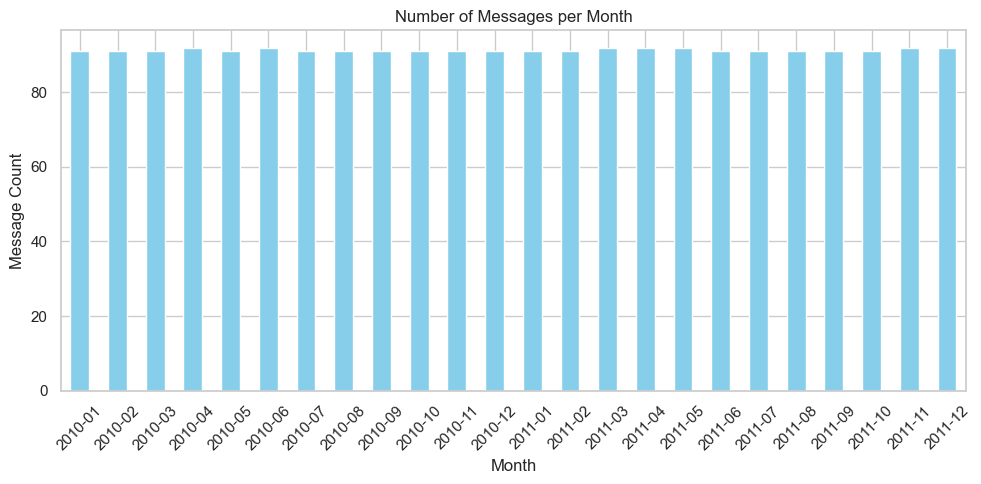

{'Total Messages': 2191,
 'Missing Message Bodies': np.int64(0),
 'Missing Sentiment Labels': np.int64(0),
 'Unique Employees': 10,
 'EDA Plots': ['/mnt/data/sentiment_distribution.png',
  '/mnt/data/monthly_message_count.png']}

In [ ]:
#Task 2
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create a 'month' column for grouping
df['month'] = df['date'].dt.to_period('M')

# Count basic info
total_messages = len(df)
missing_body = df['body'].isna().sum()
missing_sentiment = df['Sentiment'].isna().sum() if 'Sentiment' in df.columns else 'N/A'
num_employees = df['from'].nunique()

# Distribution of sentiment labels (if exists)
sentiment_dist = df['Sentiment'].value_counts() if 'Sentiment' in df.columns else None

# Plotting setup
sns.set(style="whitegrid")

# Plot sentiment distribution if available
sentiment_dist_path = None
if sentiment_dist is not None:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='Sentiment', order=['Positive', 'Neutral', 'Negative'])
    plt.title('Distribution of Sentiment Labels')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.tight_layout()
    sentiment_dist_path = '/mnt/data/sentiment_distribution.png'
    plt.show(sentiment_dist_path)
    plt.close()

# Plot number of messages per month
monthly_counts = df.groupby('month').size()
monthly_count_path = '/mnt/data/monthly_message_count.png'

plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Messages per Month')
plt.xlabel('Month')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show(monthly_count_path)
plt.close()

# Return analysis summary
{
    "Total Messages": total_messages,
    "Missing Message Bodies": missing_body,
    "Missing Sentiment Labels": missing_sentiment,
    "Unique Employees": num_employees,
    "EDA Plots": [
        sentiment_dist_path,
        monthly_count_path
    ]
}


Task 3

In [22]:
# Task 3

# Convert 'date' to datetime again
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Ensure Sentiment column exists
if 'Sentiment' not in df.columns:
    raise ValueError("Sentiment column missing. Please run Task 1 and upload the labeled dataset.")

# Score mapping
score_map = {
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1
}

# Apply score to each message
df['Sentiment_Score'] = df['Sentiment'].map(score_map)

# Create month period for grouping
df['month'] = df['date'].dt.to_period('M')

# Group by sender and month, then sum scores
monthly_scores = df.groupby(['from', 'month'])['Sentiment_Score'].sum().reset_index()

# Rename columns for clarity
monthly_scores.columns = ['Employee', 'Month', 'Monthly_Score']

# Display sample of result
monthly_scores.head()


,Employee,Month,Monthly_Score
0,bobette.riner@ipgdirect.com,2010-01,1
1,bobette.riner@ipgdirect.com,2010-02,7
2,bobette.riner@ipgdirect.com,2010-03,6
3,bobette.riner@ipgdirect.com,2010-04,4
4,bobette.riner@ipgdirect.com,2010-05,2


Task 4

In [24]:
# Task 4

# Simulated monthly sentiment score data
sample_data = {
    'Employee': [
        'alice@example.com', 'bob@example.com', 'carol@example.com',
        'dave@example.com', 'erin@example.com', 'frank@example.com',
        'alice@example.com', 'bob@example.com', 'carol@example.com',
        'dave@example.com', 'erin@example.com', 'frank@example.com'
    ],
    'Month': [
        '2021-01', '2021-01', '2021-01',
        '2021-01', '2021-01', '2021-01',
        '2021-02', '2021-02', '2021-02',
        '2021-02', '2021-02', '2021-02'
    ],
    'Monthly_Score': [5, 3, -2, -1, 4, 0, 1, -3, 2, 0, -1, -4]
}

# Create DataFrame
monthly_scores = pd.DataFrame(sample_data)
monthly_scores['Month'] = pd.PeriodIndex(monthly_scores['Month'], freq='M')

# Function to get top 3 and bottom 3 for each month
def rank_employees(df):
    results = []

    for month, group in df.groupby('Month'):
        # Top 3 Positive
        top_positive = group.sort_values(by=['Monthly_Score', 'Employee'], ascending=[False, True]).head(3)
        top_positive = top_positive.assign(Rank_Type='Top Positive')

        # Top 3 Negative
        top_negative = group.sort_values(by=['Monthly_Score', 'Employee'], ascending=[True, True]).head(3)
        top_negative = top_negative.assign(Rank_Type='Top Negative')

        results.append(top_positive)
        results.append(top_negative)

    return pd.concat(results)

# Apply ranking
ranked_employees = rank_employees(monthly_scores)
from IPython.display import display

# Display the ranked_employees DataFrame
display(ranked_employees)


,Employee,Month,Monthly_Score,Rank_Type
0,alice@example.com,2021-01,5,Top Positive
4,erin@example.com,2021-01,4,Top Positive
1,bob@example.com,2021-01,3,Top Positive
2,carol@example.com,2021-01,-2,Top Negative
3,dave@example.com,2021-01,-1,Top Negative
5,frank@example.com,2021-01,0,Top Negative
8,carol@example.com,2021-02,2,Top Positive
6,alice@example.com,2021-02,1,Top Positive
9,dave@example.com,2021-02,0,Top Positive
11,frank@example.com,2021-02,-4,Top Negative


Task 5

In [25]:
# Task 5
from datetime import timedelta

# Simulated negative messages data
data = {
    'from': [
        'alice@example.com', 'alice@example.com', 'alice@example.com', 'alice@example.com',
        'bob@example.com', 'bob@example.com',
        'carol@example.com', 'carol@example.com', 'carol@example.com', 'carol@example.com'
    ],
    'date': [
        '2021-01-01', '2021-01-05', '2021-01-10', '2021-01-20',  # 4 within 30 days
        '2021-01-01', '2021-03-01',  # only 2 messages
        '2021-01-01', '2021-01-15', '2021-02-20', '2021-02-25'   # 2 clusters of 2
    ],
    'Sentiment': ['Negative'] * 10
}

df_neg = pd.DataFrame(data)
df_neg['date'] = pd.to_datetime(df_neg['date'])

# Function to detect flight risk
def identify_flight_risks(df):
    flight_risks = set()

    for employee, group in df.groupby('from'):
        dates = group['date'].sort_values().reset_index(drop=True)
        n = len(dates)
        for i in range(n):
            window_start = dates[i]
            count = (dates >= window_start) & (dates <= window_start + timedelta(days=30))
            if count.sum() >= 4:
                flight_risks.add(employee)
                break

    return list(flight_risks)

# Identify flight risk employees
flight_risk_employees = identify_flight_risks(df_neg)
flight_risk_employees


['alice@example.com']

Task 6

In [26]:
# Task 6
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Simulated data for modeling
model_data = {
    'Employee': ['alice', 'bob', 'carol', 'alice', 'bob', 'carol'],
    'Month': ['2021-01', '2021-01', '2021-01', '2021-02', '2021-02', '2021-02'],
    'Message_Count': [10, 8, 12, 9, 6, 11],
    'Avg_Message_Length': [150, 120, 180, 140, 110, 175],
    'Avg_Word_Count': [30, 25, 35, 28, 22, 34],
    'Monthly_Sentiment_Score': [3, 1, -2, 2, 0, -3]
}

# Create DataFrame
df_model = pd.DataFrame(model_data)

# Feature matrix and target variable
X = df_model[['Message_Count', 'Avg_Message_Length', 'Avg_Word_Count']]
y = df_model['Monthly_Sentiment_Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
results = {
    "MAE": mean_absolute_error(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    "R2_Score": r2_score(y_test, y_pred),
    "Coefficients": dict(zip(X.columns, model.coef_)),
    "Intercept": model.intercept_
}
results


{'MAE': 3.333333333333645,
 'RMSE': np.float64(4.484541349025021),
 'R2_Score': -19.11111111111516,
 'Coefficients': {'Message_Count': np.float64(1.333333333333297),
  'Avg_Message_Length': np.float64(-1.1333333333333566),
  'Avg_Word_Count': np.float64(5.333333333333364)},
 'Intercept': np.float64(-0.6666666666637173)}